# Download Data

In [1]:
!gdown 1Yh4-oBajQpMstZtm8-ZfbzUu0TA7G8S0
!unzip /content/DerajatAlergi.zip

Downloading...
From: https://drive.google.com/uc?id=1Yh4-oBajQpMstZtm8-ZfbzUu0TA7G8S0
To: /content/DerajatAlergi.zip
100% 14.3M/14.3M [00:00<00:00, 80.1MB/s]
Archive:  /content/DerajatAlergi.zip
  inflating: resultados/grau1/1626_1.PNG  
  inflating: resultados/grau1/1626_21.PNG  
  inflating: resultados/grau1/1629_11.PNG  
  inflating: resultados/grau1/1629_21.PNG  
  inflating: resultados/grau1/1629_23.PNG  
  inflating: resultados/grau1/1629_24.PNG  
  inflating: resultados/grau1/1629_28.PNG  
  inflating: resultados/grau1/1630_11.PNG  
  inflating: resultados/grau1/1630_21.PNG  
  inflating: resultados/grau1/1630_23.PNG  
  inflating: resultados/grau1/1630_24.PNG  
  inflating: resultados/grau1/1630_28.PNG  
  inflating: resultados/grau1/1633_27.PNG  
  inflating: resultados/grau1/1634_27.PNG  
  inflating: resultados/grau1/1645_21.PNG  
  inflating: resultados/grau1/1646_21.PNG  
  inflating: resultados/grau1/1646_28.PNG  
  inflating: resultados/grau1/1647_5.PNG  
  inflating: re

# Setup

In [2]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
import numpy as np
import cv2
import pandas as pd
from PIL import Image
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import Callback
from shutil import copyfile
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
!pip install keras-tuner --upgrade
from kerastuner.tuners import RandomSearch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 6.9 MB/s eta 0:00:00


<ipython-input-2-a3ac6863091c>:17: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [3]:
# Define root directory
root_dir = '/content/dataset'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

# FUNCTION: create_train_val_dirs
def create_train_val_dirs(root_path):
  """
  Creates directories for the train and test sets
  Args:
    root_path (string) - the base directory path to create subdirectories from
  Returns:
    None
  """
  ### START CODE HERE
  path = os.path.join(root_path, "training")
  os.makedirs(path)
  path_1 = os.path.join(path, "d1")
  os.makedirs(path_1)
  path_2 = os.path.join(path, "d2")
  os.makedirs(path_2)
  path_2 = os.path.join(path, "d3")
  os.makedirs(path_2)
  path = os.path.join(root_path, "validation")
  os.makedirs(path)
  path_3 = os.path.join(path, "d1")
  os.makedirs(path_3)
  path_4 = os.path.join(path, "d2")
  os.makedirs(path_4)
  path_4 = os.path.join(path, "d3")
  os.makedirs(path_4)
  ### END CODE HERE

try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [4]:
# FUNCTION: split_data
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
  """
  Splits the data into train and test sets
  Args:
    SOURCE_DIR (string): directory path containing the images
    TRAINING_DIR (string): directory path to be used for training
    VALIDATION_DIR (string): directory path to be used for validation
    SPLIT_SIZE (float): proportion of the dataset to be used for training
  Returns:
    None
  """
  ### START CODE HERE
  files = []
  for filename in os.listdir(SOURCE_DIR):
    file = SOURCE_DIR + filename
    if os.path.getsize(file) > 0:
      files.append(filename)
    else:
      print(filename + ' is zero length, so ignoring.')

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

  for filename in training_set:
    src_file = SOURCE_DIR + filename
    dest_file = TRAINING_DIR + filename
    copyfile(src_file, dest_file)

  for filename in testing_set:
    src_file = SOURCE_DIR + filename
    dest_file = VALIDATION_DIR + filename
    copyfile(src_file, dest_file)
  ### END CODE HERE

# **Data Prep**

## Split Val

In [5]:
split_size = .865

## Data Extraction

In [6]:
# Define paths
d1_SOURCE_DIR = "/content/resultados/grau1/"
d2_SOURCE_DIR = "/content/resultados/grau2/"
d3_SOURCE_DIR = "/content/resultados/grau3/"

TRAINING_DIR = "/content/dataset/training/"
VALIDATION_DIR = "/content/dataset/validation/"

TRAINING_d1_DIR = os.path.join(TRAINING_DIR, "d1/")
VALIDATION_d1_DIR = os.path.join(VALIDATION_DIR, "d1/")

TRAINING_d2_DIR = os.path.join(TRAINING_DIR, "d2/")
VALIDATION_d2_DIR = os.path.join(VALIDATION_DIR, "d2/")

TRAINING_d3_DIR = os.path.join(TRAINING_DIR, "d3/")
VALIDATION_d3_DIR = os.path.join(VALIDATION_DIR, "d3/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_d1_DIR)) > 0:
  for file in os.scandir(TRAINING_d1_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_d1_DIR)) > 0:
  for file in os.scandir(VALIDATION_d1_DIR):
    os.remove(file.path)

if len(os.listdir(TRAINING_d2_DIR)) > 0:
  for file in os.scandir(TRAINING_d2_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_d2_DIR)) > 0:
  for file in os.scandir(VALIDATION_d2_DIR):
    os.remove(file.path)

if len(os.listdir(TRAINING_d3_DIR)) > 0:
  for file in os.scandir(TRAINING_d3_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_d3_DIR)) > 0:
  for file in os.scandir(VALIDATION_d3_DIR):
    os.remove(file.path)

# Define proportion of images used for training

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(d1_SOURCE_DIR, TRAINING_d1_DIR, VALIDATION_d1_DIR, split_size)
split_data(d2_SOURCE_DIR, TRAINING_d2_DIR, VALIDATION_d2_DIR, split_size)
split_data(d3_SOURCE_DIR, TRAINING_d3_DIR, VALIDATION_d3_DIR, split_size)

# Check that the number of images matches the expected output

# Your function should perform copies rather than moving images so original directories should contain unchanged images
print(f"\n\nOriginal cat's directory has {len(os.listdir(d1_SOURCE_DIR))} images")
print(f"\n\nOriginal cat's directory has {len(os.listdir(d2_SOURCE_DIR))} images")
print(f"\n\nOriginal cat's directory has {len(os.listdir(d3_SOURCE_DIR))} images")

# Training and validation splits
print(f"There are {len(os.listdir(TRAINING_d1_DIR))} images of d1 for training")
print(f"There are {len(os.listdir(VALIDATION_d1_DIR))} images of d1 for validation")

print(f"There are {len(os.listdir(TRAINING_d2_DIR))} images of d2 for training")
print(f"There are {len(os.listdir(VALIDATION_d2_DIR))} images of d2 for validation")

print(f"There are {len(os.listdir(TRAINING_d3_DIR))} images of d3 for training")
print(f"There are {len(os.listdir(VALIDATION_d3_DIR))} images of d3 for validation")



Original cat's directory has 415 images


Original cat's directory has 445 images


Original cat's directory has 369 images
There are 358 images of d1 for training
There are 57 images of d1 for validation
There are 384 images of d2 for training
There are 61 images of d2 for validation
There are 319 images of d3 for training
There are 50 images of d3 for validation


In [7]:
class_names = sorted(os.listdir('/content/dataset/training'))
class_length = len(class_names)
image = cv2.imread('/content/dataset/training/d1/1630_11.PNG')
print(image.shape)
class_length

(53, 66, 3)


3

# **Training**

## Hyper parameter

In [8]:
# Hyperparameter
input_shape = (64,64)
batch_size = 32
learning_rate=0.000000004

featurewise_center=False
samplewise_center=False

featurewise_std_normalization=False
samplewise_std_normalization=False

zca_whitening=False
zca_epsilon=1e-06

rotation_range=45

width_shift_range=0.1
height_shift_range=0.1

brightness_range=None
shear_range=0.0
zoom_range=0.0
channel_shift_range=0.0

fill_mode='nearest'

cval=0.0

horizontal_flip=True
vertical_flip=True

rescale=1.0/255.0

preprocessing_function=None
data_format=None
validation_split=0.0
interpolation_order=1
dtype=None

## TrainValGenerator

In [9]:
# FUNCTION: train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  """
  Creates the training and validation data generators
  Args:
    TRAINING_DIR (string): directory path containing the training images
    VALIDATION_DIR (string): directory path containing the testing/validation images
  Returns:
    train_generator, validation_generator - tuple containing the generators
  """
  ### START CODE HERE
  train_datagen = ImageDataGenerator( featurewise_center=featurewise_center,
                                      samplewise_center=samplewise_center,
                                      featurewise_std_normalization=featurewise_std_normalization,
                                      samplewise_std_normalization=samplewise_std_normalization,
                                      zca_whitening=zca_whitening,
                                      zca_epsilon=zca_epsilon,
                                      rotation_range=rotation_range,
                                      width_shift_range=width_shift_range,
                                      height_shift_range=height_shift_range,
                                      brightness_range=brightness_range,
                                      shear_range=shear_range,
                                      channel_shift_range=channel_shift_range,
                                      fill_mode=fill_mode,
                                      cval=cval,
                                      horizontal_flip=horizontal_flip,
                                      vertical_flip=vertical_flip,
                                      rescale=rescale,
                                      preprocessing_function=preprocessing_function,
                                      interpolation_order=interpolation_order,
                                      dtype=dtype)
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=batch_size,
                                                      class_mode='categorical',
                                                      target_size=input_shape)

  validation_datagen = ImageDataGenerator(rescale=1/255)
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=batch_size,
                                                                class_mode='categorical',
                                                                target_size=input_shape)
  ### END CODE HERE
  return train_generator, validation_generator

In [10]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 1061 images belonging to 3 classes.
Found 168 images belonging to 3 classes.


## Model for Training

In [11]:
# FUNCTION: create_model
def create_model():
  ### START CODE HERE
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(2, (3,3), activation='relu',input_shape=(input_shape[0], input_shape[1], 3)),
      tf.keras.layers.MaxPooling2D(2, 2),

      tf.keras.layers.Conv2D(4, (3,3), activation='relu',),
      tf.keras.layers.MaxPooling2D(2, 2),

      # tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      # tf.keras.layers.MaxPooling2D(2,2),

      # tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      # tf.keras.layers.MaxPooling2D(2,2),

      # tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      # tf.keras.layers.MaxPooling2D(2,2),

      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(32,
                            activation='relu'),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(class_length, activation='softmax')
  ])

  model.compile(loss='categorical_crossentropy',
                optimizer= tf.keras.optimizers.Adam(lr=learning_rate),
                # optimizer= tf.keras.optimizers.experimental.RMSprop(lr=0.005),
                metrics=['accuracy'])
  ### END CODE HERE

  return model

my_model = create_model()

## Training Process

### CallBacnk Func

In [12]:
class StopTrainingCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('val_accuracy') is not None and logs.get('val_accuracy') > 0.7:
            print("Validation accuracy reached the desired threshold. Stopping training.")
            self.model.stop_training = True

### Train

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 2)         56        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 2)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 4)         76        
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 4)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                2

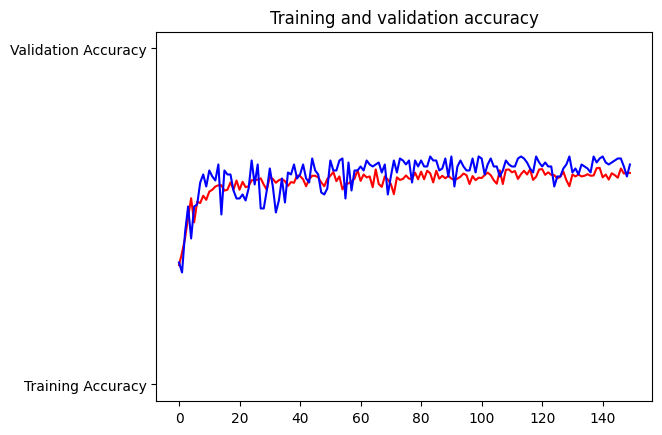

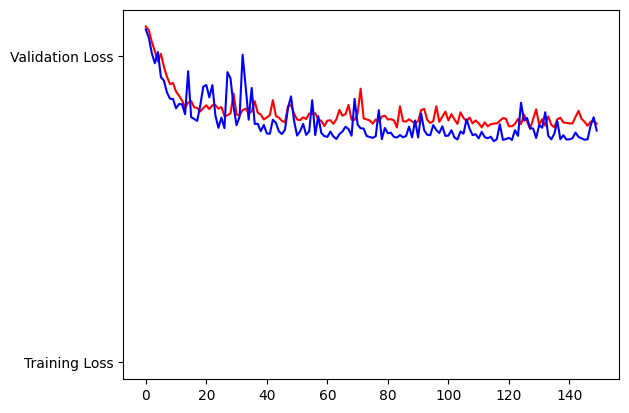

In [13]:
my_model.summary()
history = my_model.fit(train_generator,
                      epochs=150,
                      validation_data=validation_generator,
                      callbacks=[StopTrainingCallback()])

# Retrieve a list of list results on training and test data
# sets for each training epoch
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

# **Using PreTrain Model**

## Setup

In [14]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.resnet_v2 import ResNet152V2
from tensorflow.keras.applications.resnet import ResNet50, ResNet101, ResNet152
from tensorflow.keras.applications.nasnet import NASNetLarge
from tensorflow.keras.applications.densenet import DenseNet201, DenseNet169, DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(input_shape[0], input_shape[1], 3))
incepctionv3_conv = InceptionV3(weights='imagenet', include_top=False, input_shape=(input_shape[0], input_shape[1], 3))
ResNet152V2_conv = ResNet152V2(weights='imagenet', include_top=False, input_shape=(input_shape[0], input_shape[1], 3))
DenseNet201_conv = DenseNet201(include_top=False, weights="imagenet", input_tensor=None, input_shape=(input_shape[0], input_shape[1], 3), pooling=None)
DenseNet169_conv = DenseNet169(include_top=False, weights="imagenet", input_tensor=None, input_shape=(input_shape[0], input_shape[1], 3), pooling=None)
DenseNet121_conv = DenseNet121(include_top=False, weights="imagenet", input_tensor=None, input_shape=(input_shape[0], input_shape[1], 3), pooling=None)
Xception_conv = Xception(input_shape=(input_shape[0], input_shape[1], 3), include_top=False, weights="imagenet", input_tensor=None, pooling=None)
ResNet50_conv = ResNet50(input_shape=(input_shape[0], input_shape[1], 3), include_top=False, weights="imagenet", input_tensor=None, pooling=None)
ResNet101_conv = ResNet101(input_shape=(input_shape[0], input_shape[1], 3), include_top=False, weights="imagenet", input_tensor=None, pooling=None)
ResNet152_conv = ResNet152(input_shape=(input_shape[0], input_shape[1], 3), include_top=False, weights="imagenet", input_tensor=None, pooling=None)


58889256/58889256 [==============================] - 0s 0us/step


ValueError: ignored

## Model extraction

In [ ]:
def preTrainedModel(conv):
  model = tf.keras.models.Sequential()
  model.add(conv)
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(128, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(3, activation='sigmoid'))

  # Freeze the layers except the last 4 layers
  for layer in model.layers:
    print(layer)
    layer.trainable = False

  # Compile the model
  model.compile(loss='categorical_crossentropy',
                # optimizer= 'SGD',
                optimizer= tf.keras.optimizers.Adam(lr=0.00001),
                # optimizer= tf.keras.optimizers.experimental.RMSprop(lr=0.005),
                metrics=['accuracy'])
  model.summary()
  return model

## Training

In [ ]:
# Train the model
listOfPreModel = [DenseNet201_conv]
for x in listOfPreModel:
  model = preTrainedModel(x)
  history = model.fit(train_generator,
                      epochs=10,
                      verbose=1,
                      validation_data=validation_generator)

  # Retrieve a list of list results on training and test data
  # sets for each training epoch
  acc=history.history['accuracy']
  val_acc=history.history['val_accuracy']
  loss=history.history['loss']
  val_loss=history.history['val_loss']

  epochs=range(len(acc)) # Get number of epochs

  # Plot training and validation accuracy per epoch
  plt.plot(epochs, acc, 'r', "Training Accuracy")
  plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
  plt.title('Training and validation accuracy')
  plt.show()
  print("")

  # Plot training and validation loss per epoch
  plt.plot(epochs, loss, 'r', "Training Loss")
  plt.plot(epochs, val_loss, 'b', "Validation Loss")
  plt.show()

# Using Keras Autoturner

In [ ]:
def build_model(hp):
    model = keras.Sequential()
    model.add(tf.keras.layers.Conv2D(2, (3,3), activation='relu',input_shape=(input_shape[0], input_shape[1], 3)))
    model.add(tf.keras.layers.MaxPooling2D(2, 2))

    model.add(tf.keras.layers.Conv2D(4, (3,3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(2, 2))

    model.add(tf.keras.layers.Flatten())

    model.add(keras.layers.Dense(units=hp.Int('units', min_value=24, max_value=36, step=21), activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(class_length, activation='softmax'))

    model.compile(optimizer=keras.optimizers.Adam(hp.Float('learning_rate', min_value=1e-10, max_value=1e-8, sampling='log')),
                  loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Define the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=20,
    executions_per_trial=1,
    directory='/content/',
    project_name='my_project'
)

# Perform the hyperparameter search
tuner.search(train_generator, epochs=60, validation_data=validation_generator)

# Get the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]